<a href="https://colab.research.google.com/github/astroviki/NumericalMethods/blob/main/Lekce_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for Table of Contents use:
#
# pip install jupyter_contrib_nbextensions
# jupyter contrib nbextension install --sys-prefix
# jupyter nbextension enable scratchpad/main --sys-prefix
#

%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.subplots import make_subplots
from jupyterthemes import jtplot


jtplot.style(theme='gruvboxd')

# Hledání kořenů funkce $f(x)$ 

S problémem hledání nulových bodů funkce jste se mohli setkat už na střední škole, ať už se jednalo o vyšetřování průběhu funkce, nebo řešení rovnic. Pokud se jedná o lineární nebo kvadratickou rovnici, řešení je triviální. V případě nelineární rovnice lze problém řešit pouze numericky. Z historického hlediska jde o jednu z nejstarších numerických úloh. Ukážeme si hned několik metod řešení pro praktické použití. A začneme nejjednoduší metodou

## Bez chyb to nejde...

Při numerických výpočtech si musíme vždy uvědomit, že pracujeme s určitou přesností (danou např. přístrojem, metodou). Tedy každý numerický výsledek ja zatížen určitou chybou, kterou bychom měli nějak kvantifikovat. První, co nás napadne je **absolutní chyba**, rozdíl mezi skutečnou hodnotou a vypočítanou hodnotou. Absolutni chyba je dána
$$ 
\varepsilon_{\rm abs} = y_{\rm true} - y_{\rm approx} 
$$

Bohužel, takto kvantifikovaný odhad chyby není úplně relevantní. Uvažme dva případy. V prvním případě skutečná hodnota je $2666$ a vypočítaná hodnota je $2660$, v druhém případě je skutečná hodnota $1.0$ a vypočítaná hodnota je $0.9$. Přestože v prvním příadě je absolutní chyba ($y_{\rm true}=4$) výrazně větší než ve druhém případě $y_{\rm true}=0.1$), je jasné, že rprvní metoda je jasně přesnější. 

Lépe tedy chybu našeho odhadu charakterizuje 
relativní chyba, což je 
$$
\varepsilon_{\rm rel}=\frac{y_{\rm true} - y_{\rm approx}}{y_{\rm true}}
$$

## Metoda bisekce - půlení intervalu

Hledáme přibližné řešení rovnice $f(x) = 0$ na intervalu $[a,b]$. Postup je velmi jednoduchý, počáteční interval rozdělime na dvě poloviny. Hledaný nulový bod musí ležet v jednom z těchto intervalů. Konkrétně v intervalu, ve kterém dochází ke změně známenka. Takto určený interval opět rozpůlíme a celý postup opakujeme do té doby, než rozdíl mezi krajními hodnotami intervalu dosáhne námi požadované přesnosti. Nyní si již mužeme princip metody shrnout  

### Předpoklady metody

1. Musí existovat hodnoty $a$ a $b$ takové, $F(a)F(b)<0$ a bod $x \in [a,b]$, kde $F(x)=0$
 <img src="https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/Bisekce.png?raw=1" alt="Bisekce" align="right"> 

2. Tolerance hledaného řešení $x_{\rm bisection}$

$$
f(x_{\rm bisection}) \leq \varepsilon
$$

### Algoritmus metody
 
 Hledáme nulový bod na intervalu $<a,b>$, který splňuje výše uvedené předpoklady
 


---


 0. Počáteční nastavení hraničních bodu $a_i = a$, $b_i =b$ pro $i = 0$
 0. Z hraničních bodů intervalu spočítej střední bod vztahem
 
 $$
 c_i = a_i + \frac{b_i-a_i}{2}
 $$
 0. Pokud $f(c_i) < \varepsilon$, pak je $c_i$ odhad hledaného nulového bodu
 0. V opačném případě pokračuj v hledání
 0. Pokud $f(c_i)f(a_i)>0$, pak nové hraniční body jsou $a_i = c_i$, $b_i = b_i$
 0. Pokud $f(c_i)f(a_i)<0$, pak nové hraniční body jsou $a_i = a_i$, $b_i = c_i$
 0. Opakuj kroky od 2.


---

Algoritmus si prakticky ukážeme v jazyce PYTHON. Funkce pro stanovení kořene bude mít hned několik povinných argumentů. Prvním bude funkce, na které hledáme kořen, dále hraniční body intervalu, na kterém tyto kořeny hledáme. A nakonec také maximální počet iterací pro hledání kořene (tím zamezíme nechtěnému příliš dlouhému hledání v případě chybného zadaní).

In [ ]:
# Method of bisection
def Bisection(f, a, b, Nmax):
  '''
  Root estimation based on the method of bisection

  Parameters:
  -----------
  f : function for root estimation on the interval 
  a,b: float, edges of the interval a < b
  Nmax: int, maximal number of iterations
  '''
    root = False
    epsilon = 0.000001
    # verifying the assumption, f(a).f(b) < 0. step 1.
    if f(a)*f(b) > 0:
        print('Error, f(a) and f(b) should have opposite signs')
        return False

    # Assigning the initial interval border points - step 2.
    ai = a
    bi = b
    # Iterations
    n = 1
    while (not(root) and n <= Nmax):
        # Bisection , middle point step 3.
        c = (ai+bi)/2.0
        # Condition step 4.
        if (abs(f(c)) < epsilon):
            root = True
        if f(c)*f(ai) > 0:
            ai = c
        # Condition B
        elif f(c)*f(ai) < 0:
            bi = c
        # Condition C: repeat the cycle
        n += 1
    # Final result
    return c

Naši metodu si otestujeme na příkladu mocninné funkce
$$
f(x) = x^3-2.0
$$
Hledáme nulové body funkce na intervalu $x\in[0,2]$. 

In [ ]:
# Testing function for root finding problem
def fce(x):
    return x**3.0-2.0

x = np.linspace(0, 2)
x_r = Bisection(fce, 0, 2, 1000)
text = ('Root estimate: %0.4f with tolerance %.04f' % (x_r, fce(x_r)))# Testing function for problem of root finding


Výsledek výpočtu si ověříme vykreslením grafu funkce a porovnáním numerického výsledku s realitou 

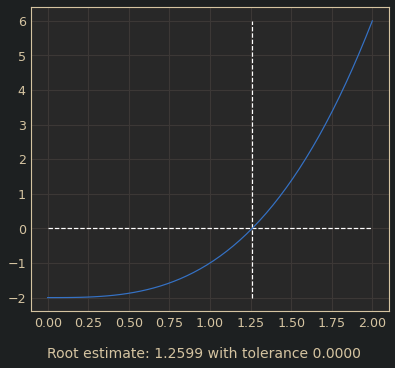

In [ ]:
plt.plot(x, fce(x))
plt.vlines(x_r,-2,6,colors='white',linestyles='dashed')
plt.hlines(0,0,2.0,colors='white',linestyles='dashed')
plt.figtext(0.5, 0.01, text, wrap=False, horizontalalignment='center', fontsize=14);


#### Praktický příklad
V nebeské mechanice při řešení problému dvou těles narazíme záhy na nutnost řešit Keplerovu rovnici,
<img src="https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/anomalies.png?raw=1" alt="Kepler Problem" width="200" height="175" align="right">
$$
M = E - e \sin{E}
$$
která je svou povahou transcendentní. Tato rovnice dává do vzájemné souvislosti vztah mezi střední anomálií $M$, excentrickou anomálii $E$ a excentricitu dráhy $e$. Střední anomálie je dána vztahem
$$
M = \sqrt{\frac{GM}{a^3}}t.
$$

Souřadnice obíhajícího tělesa jako funkci času dostaneme parametrizací
$$
x(t) = a(\cos(E) - \epsilon) \\
y(t) = b \sin{E},
$$
kde a je hlavní poloosa a $b = a\sqrt{1-\epsilon^2}$ je vedlejší poloosa. Implicitní časovou závislost excentrické anomálie najdeme řešením Keplerovy rovnice.


---


**Problém:**

Satelit obíhá Zemi kolem rovníku po trajektorii s excentricitou $e = 0.5$ po geostacionární dráze s velikostí hlavní poloosy $ a = 35 900 $ km. Určete souřadnice x,y satelitu v 15 minutových intervalech po dobu 5 hodin.


---



In [ ]:
# Parameters
# Eccentricity
eps = 0.5
# Major semi-axis
a = 35900e3
# Gravitational constant
G = 6.67384e-11
# Earth Mass [kg]
Mz = 5.972e24

# Minor semi-axis
b = a*(1-eps**2.0)**0.5

# Constant in relation between Mean Anomaly and Time
const = ((G*Mz)/a**3.0)**0.5

tf = 5.0*3600.0
t0 = 0.
timestep = 15.0*60.

# Kepler equation
def Kepler( E ):
    return E - eps*np.sin(E) - const*t

def coordinates(E):
    x = a*(np.cos(E)-eps)
    y = b*np.sin(E)
    return [x/1.e3, y/1.e3]

times = np.arange(t0, tf, timestep)

position = []

a0 = -10
b0 = 10
Niter = 100

# initialize list of lists 
data = [] 

for t in times:
    E = Bisection(Kepler,a0,b0,Niter)
    satellite_x,satellite_y = coordinates(E)
    data.append([t/3600,int(satellite_x),int(satellite_y)])

# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Time','X', 'Y']) 

pio.templates.default = "plotly_dark"

fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=False,
    horizontal_spacing=0.03,
    specs=[[{"type": "scatter"},
           {"type": "table"}]]
)


c3 = list(df['Time'])
fig.add_trace(
    go.Scatter(
        x=df['X'],
        y=df['Y'],
        mode="lines+markers",
        text = df['Time'],
        name = "",
        hovertemplate =
            'X: %{x:.0f} km<br>' +
            'Y: %{y:.0f} km<br>' +
            'Time: %{text} h'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["Time [h]", "X [km]", "Y [km]"],
            font=dict(size=10),
            align="center"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns[:]],
            align = "left")
    ),
    row=1, col=2
)


fig.update_layout(
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Rockwell"),
        yaxis = dict(
            showexponent = 'all',
            exponentformat = 'none'),
        width = 990,
        height = 625,
        showlegend = False,
        title_text = "Satellite movement")

fig.show()


## Iterace k pevnému bodu
Metoda bisekce je velmi jednoduchá pro implementaci a v mnoha případech je dostačující i přes relativně větší nároky na výpočetní čas. Přesto jsou různé patologické případy, kdy musíme použít jiné alternativní metody. Jednou z nich je následující metoda, jejíchž hlavní výhoda spočívá v tom, že nemusíme znát prohledávaný interval, namísto toho algoritmus sám konverguje požadovanému řešení.

### Algoritmus metody

0. Přepíšeme naši funkci $f(x)$, pro kterou hledáme kořen do tvaru $$f(x)=x-g(x)$$
0. Zvolíme počáteční odhad řešení (hledaného kořenu) $k_1$
0. Budeme cyklicky opakovat následující sekvenci, pokud nebude rozdíl mezi po sobě jdoucími odhady kořene menší než požadovaná přesnost, nebo nepřesáhneme danný počet iterací.
    0. Další zpřesněný odhad řešení dostaneme ze vztahu $$k_{i+1}=g(k_i)$$
    0. Pokud je rozdíl mezi odhadem $k_{i+1}-k_i < \varepsilon$, nebo počet iterací přesáhnul maximální počet povolených ukončíme cyklus.

Vidíme, že hledání kořene dané funkce jsme převedli na hledání pevného bodu funkce

$$
x = g(x).
$$

**Problém: najděte kořen funkce**
$$
f(x) = \frac{x^2-1}{3}
$$

In [ ]:
def f(x):
    return (x**2-1.0)/3.0
def g(x):
    return x - f(x)

def iterated_fixed_point(user_func,x_0 = 0.1, epsilon=0.001):
    MAX_ITER = 100
    eps = 10.*epsilon
    n = 0
    x = x_0
    while (eps > epsilon and n < MAX_ITER) :
        x_old = x
        x = user_func(x)
        eps = abs(x_old-x)
        n += 1
        print('%i %0.4f' % (n,x))
    return x

root = iterated_fixed_point(g)
print('Hledaný kořen je: %0.4f' % root)

1 0.4300
2 0.7017
3 0.8709
4 0.9514
5 0.9830
6 0.9942
7 0.9981
8 0.9994
9 0.9998
Hledaný kořen je: 0.9998


### Verhaulsteův diagram

Jedná se o užitečný způsob visualizace dynamického systému reprezentovaného jedno-dimenzionální diskrétní mapou (například logistická mapa). Umožňuje analyzovat vývoj systému po zadání počátečních podmínek a odhalit případné pevné body zobrazení.

**Algoritmus** 

0. Zvol počáteční odhad $x = x_0$.
0. Na ose vyznač bod o souřadnicích $(x,0)$.
0. Z něj nakresli vertikální čáru do bodu $(x,f(x))$.
0. Z tohoto bodu veď horizontální čáru do bodu $(f(x),f(x))$.
0. Pokračujeme vertikální čárou do bodu $(f(x),f(f(x)))$.
0. Body 4 a 5 opakujeme rekurzivně do předem daného počtu iterací.

In [ ]:
# Plotting Verhaulst diagram

def get_VH_points( x_ini = 0.1, n = 20):
    x = x_ini
    VH_points = [(x,0)]
    
    for i in range(n):
        y1 = g(x)
        VH_points.append((x,y1))
        VH_points.append((y1,y1))
        y2 = g(y1)
        VH_points.append((y1,y2))
        x = y1
    
    return zip(*VH_points)

def get_functions_points(n_iter=10):
    x_vals = np.linspace(0,1.3,n_iter)
    y_vals = [g(x) for x in x_vals]
    return x_vals, y_vals

def plot_VH(function_n = 1000, VH_n = 10, VH_x = 0.1):
    func_x_vals,func_y_vals = get_functions_points(n_iter=function_n)
    VH_x_vals,VH_y_vals = get_VH_points(x_ini = VH_x, n = VH_n)
    
    fig, ax = plt.subplots(figsize = (6,6))
    diagonal_line = ax.plot((0,1.3), (0,1.3), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals, func_y_vals, color = 'r', s=1.5)
    VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)
    
    ax.set_ylim((0,1.3))
    ax.set_xlim((0,1.3))
    
    plt.show()
    return 

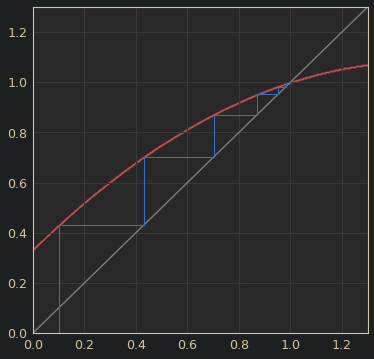

In [ ]:
plot_VH()

Matematicky řečeno, diskrétní mapu lze jej formálně zapsat jako

$$
x_{n+1} = f(x_n)
$$

Jak už bylo výše psáno, pomocí diskrétních map lze popsat chování dynamických systémů. Můžeme si představit, že tak dostáváme informaci o systému v ekvidistantních diskrétních časových krocích. V určitých případech můžeme však při aplikaci tohoto způsobu na nelineární diskrétní mapy dostat velmi překvapivý výsledek. Jako vhodný příklad může posloužit [logistická rovnice](https://en.wikipedia.org/wiki/Logistic_map). 

$$
x_{n+1} = r x_{n}(x_{n}-1)
$$
Tato rovnice nám zjednodušeně popisuje vývoj populace, zahrnujíc dva podstatné efekty

* Populace vzrůstá rychleji, čím je větší
* Čím je větší populace, ubývá zdrojů a populace není schopna se uživit

Postup řešení bude stejný jako v předchozím případě, jenom zde ještě do funkce zahrneme jako parameter sílu zpětné vazby $r$. Uvidíme, že velikost tohoto parametru bude pro chování systému klíčové.

In [ ]:
# Logistic equation
def logistic_map(x,r):
    return x*r*(1.0-x)

# Calculate points for Verhaulst diagram
def get_VH_points(r, x=0.5, n=100):
    # Points will be stored in tuple
    
    # Initialization and first point 
    VH_points  = [(x,0)]
    for i in range(n):
        y1 = logistic_map(x,r)
        VH_points.append((x,y1))
        VH_points.append((y1,y1))
        y2 = logistic_map(y1,r)
        VH_points.append((y1,y2))
        x = y1
    return zip(*VH_points)

# Calculate y-points from from logistic equation for x in range(0,1)
def get_function_points(r, n =1000):
    x_vals = np.linspace(0,1,n)
    y_vals = [logistic_map(x,r) for x in x_vals]
    return x_vals, y_vals


# Plotting VerhaulsteŮv diagram 
def plot_VH(r, function_n = 1000, VH_n = 100, VH_x = 0.5):
    func_x_vals, func_y_vals = get_function_points(r=r, n=function_n)
    VH_x_vals, VH_y_vals = get_VH_points(r=r, x = VH_x, n = VH_n)
    
    fig, ax = plt.subplots(figsize = (6,6))
    diagonal_line = ax.plot((0,1), (0,1), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals,func_y_vals, color= 'r', edgecolor='None', s=1.5)
    VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)
    
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
    
    plt.show()

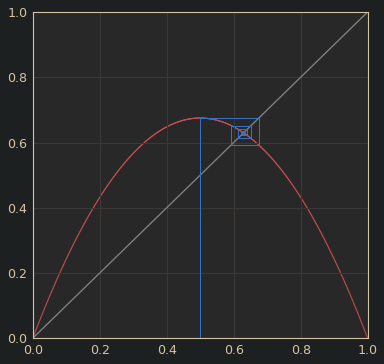

In [ ]:
plot_VH(r=2.7)

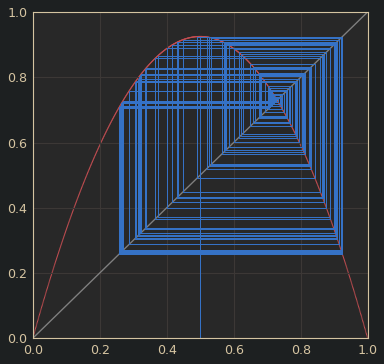

In [ ]:
plot_VH(r=3.7)

Jak je patrné z předchozích grafů, v závislosti na parametru $r$ je hledaný pevný bod zobrazení stabilní (první případ) nebo nestabilní (druhý případ), což může vést až k chaotickému chování systému. 

### Úkoly

* Zkuste nalézt další případy nelineárních diskrétních map, vykazující zajimavé až chaotické chování
* Předchozí postup konstrukce Verhaulsteova diagramu zkuste přepracovat do formy interaktvní formy s využitím widgetů

## Iterace v komplexním oboru

Nemůžu si odpustit, když už jsme narazili na iterativní metody, nezmínit se o fraktálních množinách, které lze spatřit při studiu rychlosti konvergence map v komplexním oboru. Jaké muselo být asi překvapení prvních matematických průzkumníků těchto map, když pod jejich pláštíkem matematické rigoróznosti spatřili takřka dokonalý umělecký obraz nekonečné složitosti, rozmanitosti, jedinečnosti obalené estetickou dokonalostí. Zkusme si to také !

Poslouží nám k tomu opět kvadratická mapa, podobně jako v předchozích případech. Tentokrát ji však budeme analyzovat v komplexním oboru. Přesný tvar naší kvadratické mapy je

$$
z_{n+1} = z_n^2 + c
$$

kde $z,c$ jsou komplexní čísla. Otázka zní, pro jaké hodnoty čísla $c$ zůstává absolutní hodnota čísla $z_n$ ohraničena po daný počet iterací $n$. Problém lze znázornit graficky, zkoumanou rozsah velikosti komplexního čísla $c$ si můžeme znázornit čtvercem v komplexní rovině. Pro každý bod z této oblasti určíme, jak rychle diverguje jeho velikost resp. nediverguje po předem daný počet iterací. 

### Algoritmus metody

* Určíme si prohledávanou oblast kompexního čísla $c$. Doporučený rozsah reálné složky $c_{\rm Re} \in (0.22, -0.21)$ a imaginární složky $c_{\rm Im} \in (-0.70, -0.69)$.
* Zvolíme maximální počet iterací $N$ a počáteční hodnotu $z_0$.
* Pro každou hodnotu komplexního čísla $c$ z prohledávané oblasti spočítáme iterativně kvadratickou mapu $z_{n+1}=f(z_n)$ a pokud během iterace velikost komplexního čísla překročí hodnotu $|z_n| > 2$, uložíme si hodnotu iterace $i$. Pokud tuto hodnotu nepřekročí, nebudeme tento bod považovat za divergentní.
* Této hodnotě pak přiřadíme určitou barvu, což nám ve výsledku generuje barevnou mapu pro celou prohledávanou oblast 

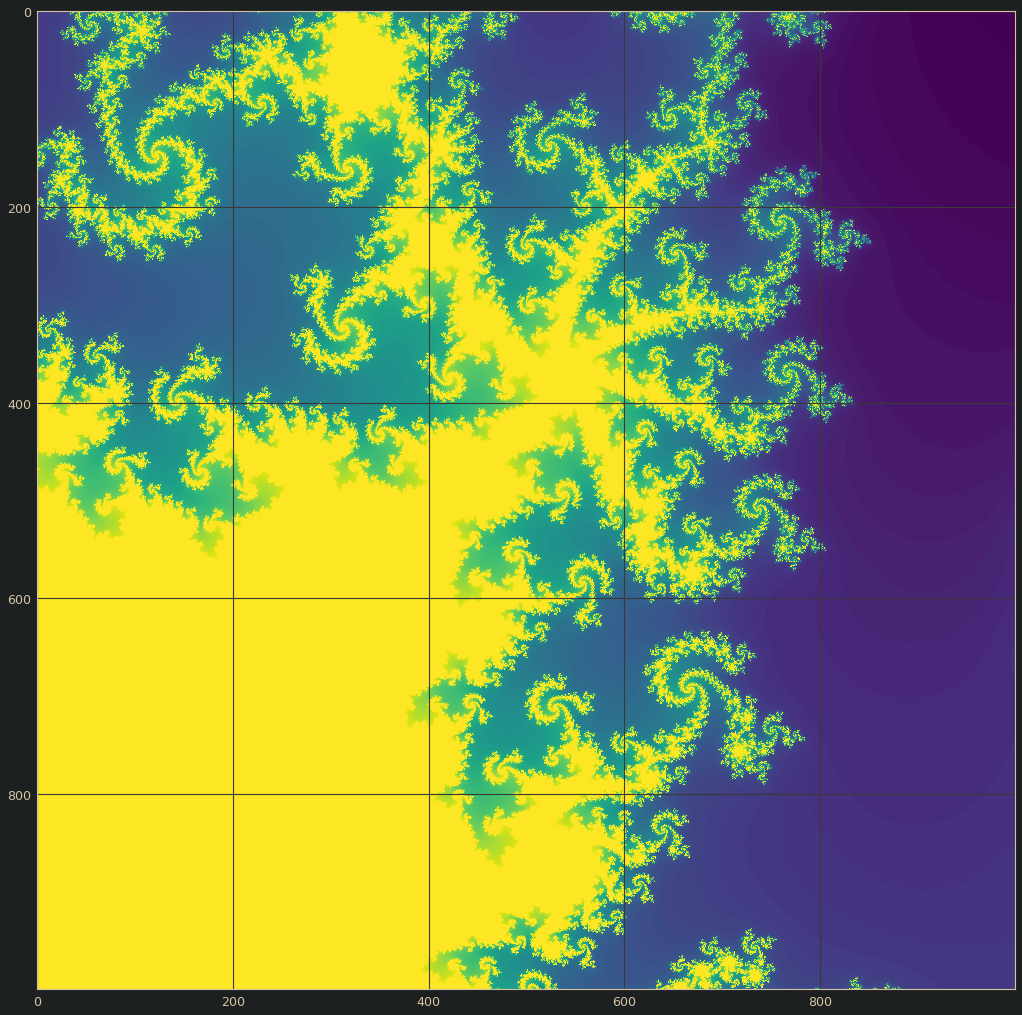

In [ ]:
def mandel(c,maxiter):
    
    z = complex(0,0)
    
    for iteration in range(maxiter):
        z = (z*z) + c
        
        if abs(z) > 4:
            break
        
    return iteration

def make_plot(xvalues,yvalues):
    
    xlen = len(xvalues)
    ylen = len(yvalues)
    
    mapa = np.zeros((xlen,ylen))
    
    for ix in range(xlen):
        for iy in range(ylen):
            
            cx = xvalues[ix]
            cy = yvalues[iy]
            
            c = complex(cx, cy)

            mapa[ix,iy] = mandel(c,120)            
    return mapa

# set the location and size of the atlas rectangle
xvalues = np.linspace(-0.22, -0.21, 1000)
yvalues = np.linspace(-0.70, -0.69, 1000)

result = make_plot(xvalues,yvalues)

fig, ax = plt.subplots(figsize=(18, 18))

ax.imshow(result, interpolation="nearest")

Výsledný obraz zobrazuje podivuhodný geometrický obrazec, který v každém bodě obsahuje svoji kopii, je soběpodobný a má neceločíselnou dimenzi. Poprvé spatřil tento fraktál [Mandelbrotova množina](https://en.wikipedia.org/wiki/Mandelbrot_set) světlo světa v roce 1978. Pro své vlastnosti se jim souhrně říká fraktály a velmi úzce souvisí s chaotickými systémy.

### Příklady
* Modifikujte komplexní kvadratickou mapu, rozsah prohledávané oblasti komplexního čísla $c$ a generujte jiné tvary fraktálu.
* Zkuste výpočet optimalizovat a zefektivnit dobu výpočtu, porovnejte si výsledné časy výpočtu
* Vytvořte animaci zoomu výpočetní oblasti fraktální množiny

## Newtonova-Raphsonova metoda
<img src=https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/Newton_Raphson.png?raw=1 width=300 height=300 align='right'>
Ačkoliv předchozí metoda *Iterace k pevnému bodu* může být mnohem rychlejší než metoda *Bisekce* uvedeme si ještě rychlejší metodu nalezení kořenu funkce. Její princip poměrně snadno pochopíme. 

Máme spojitou a diferencovatelnou funkci definovanou na intervalu $[a,b]$ a $p$ je kořen funkce takový, že $f(p)=0$. Pokud zvolíme počáteční odhad dostatečně blízko k hodnotě $p$, tedy $ |p-p_{\rm ini}| < \varepsilon$, kde $\varepsilon$ je malé číslo, můžeme rozvinout funkci okolo bodu $p$ s pomocí Taylorova rozvoje II. řádu

$$
f(p) = f(p_{\rm ini})+(p-p_{\rm ini})f'(p_{\rm ini})+\frac{(p-p_{\rm ini})^2}{2}f''(p_{\rm ini})+\mathcal{O}^3(|p-p_{\rm ini}|)
$$

jelikož dle zadání $f(p)=0$ a $|p-p_{\rm ini}|^2 \ll \varepsilon$ můžeme vyšší řád zanedbat a dostáváme pro odhad iterativní vztah

$$
p_{i+1} \approx p_{i} - \frac{f(p_i)}{f'(p_i)}
$$

### Algoritmus metody

* Určete derivaci funkce, jejíž kořen hledáme (v případě, že není analyticky zadána, je třeba derivace odhadnout numericky
* Určete počáteční odhad kořene $p_{\rm ini}$ a maximální počet iterací
* Spočítejte další odhady podle výše uvedeného vztahu iterativně dokud není počet iterací větší než povolený, nebo odhad chyby neklesne pod požadovanou úroveň.

In [ ]:
def fce(x):
    return x**3.0-2.0

def fcediff(x):
    return 3.0*x**2
    

def Newton_Raphson(f,fdiff,p_in, MAX_ITER, a, b):
    n = 0
    x_n = p_in
    # Precission limit
    h = 0.001 
    
    while ( n < MAX_ITER and f(x_n) > h):
        x_n = x_n - f(x_n)/fdiff(x_n)
        n += 1
    return x_n,n

odhad, iterace = Newton_Raphson(fce,fcediff,1.5,100,0,2)
print('Odhad kořene je: %0.4f odhad po %i iteracích ' % (odhad,iterace))

Odhad kořene je: 1.2599 odhad po 3 iteracích 


### Praktický příklad
<img src='https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/newtonuv_fraktal.png?raw=1' align='right'>
Newtonovu-Raphsonovu metodu lze efektivně použít nejen pro hledání kořenů v reálném oboru ale také v komplexním. Pokud použijeme podobný přístup, jako v případě *Iterace k pevnému bodu* a budeme zkoumat rychlost konvergence k danému kořenu v nějaké části komplexního oboru, který si pak podle určené rychlosti konvergence zabarvíme, dostaneme opět nám staré známe fraktální obrazce - *Newtonovy fraktály*.

Zkuste tedy zkonstruovat *Newtonův fraktál* pro polynom třetího stupně

$$
p(z)= z^3-1
$$

Více info [Fraktály s pomocí Newtonovy-Raphsonovy metody](http://www.chiark.greenend.org.uk/~sgtatham/newton/)

## Metoda *Regula-Falsi*

*Newton-Raphsonova* metoda konverguje k řešení mnohem rychleji než metoda *bisekce*. Navíc u mnoha funkcí jejich derivaci neznáme nebo je velmi komplikované její určení. Komplikované natolik, že může výhodu rychlosti zcela upozadit. Stačí si jako funkci představit komplikovaný vicedimenzionální integrál nelineární funkce bez analytického řešení.

Naproti tomu metoda *bisekce* má nespornou výhodu, že pokud jsou splněné předpoklady, kořen nalezne a nepotřebuje k tomu znát derivaci funkce. Otázkou je, za jak dlouho, konvergence metody nepatří mezi nejrychlejší.
Důvod její pomalostí je zakořeněn v nedostatečném využití informace, že se kořen naléza v ohraničeném intervalu $<a,b>$ a znalosti funkčních hodnot v okrajových bodech intervalu $f(a),f(b)$. Zbytečně tak prohledáváme části intervalu, ve kterých kořen být nemůže. 

<img src="https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/falsepos.jpg?raw=1" width=300 align="right">
Když však tuto informaci využijeme, můžeme s využitím těchto hodnot aproximovat průběh funkce lineární funkcí, nalézt její průsečík a použít jej jako odhad kořene. Aproximativní přímku určíme snadno z parametrického vyjádření

$$
y - f(a) =  \frac{(f(b)-f(a))}{(b-a)}(x-a)
$$

Chceme-li určit bod, kdy přímka protíná osu *x*, stačí položit podmínku $y=0$. Úpravou rovnice přímky tak dostáváme pro odhad kořene

\begin{equation}
x_{\rm odhad}=\frac{af(b)-bf(a)}{f(b)-f(a)}
\end{equation}

Pro další postup při hledání kořene musíme určit nový interval, ve kterém se mění znaménko. Pokud je hodnota $f(a)f(x_{\rm odhad})< 0$ pak kořen leží v intervalu $\left[a,x_{\rm odhad}\right]$. Pokud naopak hodnota $f(b)f(x_{\rm odhad})<0$ kořen leží v intervalu $\left[x_{\rm odhad},b\right]$

### Předpoklady metody:
Máme danou funkci $f(x)$, spojitou na intervalu $\left[a,b\right]$ na kterém existuje kořen funkce.
### Algoritmus metody:
1. Vypočítejte první odhad $x_{\rm odhad}$ kořene funkce $f(x)$ s použitím výše uvedeného vzorce na zadaném intervalu
2. Pokud je $f(x_{\rm odhad})\approx 0$ v rámci tolerance $\varepsilon < \varepsilon_{\rm tol}$ ukončíme výpočet. V opačném případě určíme nový interval pro opakovaný výpočet odhadu.
3. Pokud se mění znaménko na intervalu $\left[a,x_{\rm odhad}\right]$, tedy platí $f(a)f(x_{\rm odhad}) < 0$, zopakujeme celý výpočet na intervalu $\left[a,x_{\rm odhad}\right]$, v opačném případě zopakujeme výpočet pro interval $\left[x_{\rm odhad},b\right]$. Pokračujeme zpět na bod číslo 1.

In [ ]:


# Python3 implementation of Bisection 
# Method for solving equations 
  
MAX_ITER = 1000000
  
# An example function whose solution 
# is determined using Bisection Method.  
# The function is x^3 - x^2 + 2 
def func( x ): 
    return (x * x * x - x * x + 2) 
  
# Prints root of func(x) in interval [a, b] 
def regulaFalsi( a , b): 
    if func(a) * func(b) >= 0: 
        print("You have not assumed right a and b") 
        return -1
      
    c = a # Initialize result 
      
    for i in range(MAX_ITER): 
          
        # Find the point that touches x axis 
        c = (a * func(b) - b * func(a))/ (func(b) - func(a)) 
          
        # Check if the above found point is root 
        if func(c) == 0: 
            break
          
        # Decide the side to repeat the steps 
        elif func(c) * func(a) < 0: 
            b = c 
        else: 
            a = c 
    print("The value of root is : " , '%.4f' %c) 
  
# Driver code to test above function 
# Initial values assumed 
a =-200
b = 300
regulaFalsi(a, b) 
  
# This code is contributed by "Sharad_Bhardwaj". 


## Metoda sečen

Metoda sečen je velmi podobná předchozí metodě *regula falsi* s tím rozdílem, že nemusíme určovat interval, ve kterém se mění znaménka. Za
The secant method is used to find the root of an equation f(x) = 0. It is started from two distinct estimates x1 and x2 for the root. It is an iterative procedure involving linear interpolation to a root. The iteration stops if the difference between two intermediate values is less than convergence factor.

Initialize: x1, x2, E, n         // E = convergence indicator
calculate f(x1),f(x2)

if(f(x1) * f(x2) = E); //repeat the loop until the convergence
    print 'x0' //value of the root
    print 'n' //number of iteration
}
else
    print "can not found a root in the given interval"

### Předpoklady metody
Máme danou funkci $f(x)$, spojitou na intervalu $\left[a,b\right]$ na kterém existuje kořen funkce.
### Algoritmus metody

In [ ]:


# Python3 Program to find root of an  
# equations using secant method  
  
# function takes value of x  
# and returns f(x)  
def f(x): 
      
    # we are taking equation  
    # as x^3+x-1  
    f = pow(x, 3) + x - 1;  
    return f;  
  
def secant(x1, x2, E): 
    n = 0; xm = 0; x0 = 0; c = 0;  
    if (f(x1) * f(x2) < 0): 
        while True:  
              
            # calculate the intermediate value  
            x0 = ((x1 * f(x2) - x2 * f(x1)) / 
                            (f(x2) - f(x1)));  
  
            # check if x0 is root of  
            # equation or not  
            c = f(x1) * f(x0);  
  
            # update the value of interval  
            x1 = x2;  
            x2 = x0;  
  
            # update number of iteration  
            n += 1;  
  
            # if x0 is the root of equation  
            # then break the loop  
            if (c == 0):  
                break;  
            xm = ((x1 * f(x2) - x2 * f(x1)) / 
                            (f(x2) - f(x1))); 
              
            if(abs(xm - x0) < E): 
                break; 
          
        print("Root of the given equation =",  
                               round(x0, 6));  
        print("No. of iterations = ", n);  
          
    else: 
        print("Can not find a root in ", 
                   "the given inteval");  
  
# Driver code  
  
# initializing the values  
x1 = 0;  
x2 = 1;  
E = 0.0001;  
secant(x1, x2, E);  
  
# This code is contributed by mits 


Hybridní metody

# Integrace funkce

Integrace funkce patří mezi nejčastější problémy, se kterými se můžete setkat v praxi. Na rozdíl od učebnic, ve vetšině případů jsou funkce analyticky neintegrovatelné a jejich integrál je tak nutné hledat numerickou cestou.

## Lichoběžníkové pravidlo
<img src='https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/trapez.png?raw=1' align='right'></img>
Metoda spočívá v aproximaci určitého integrálu součtem obsahu lichoběžníků,

\begin{equation}
\int_a^b f(x){\rm d}x = \frac{h}{2}\sum_{k=1}^N (f(x_{k+1})+f(x_k)) = \frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right),
\end{equation}

které tvoří na daném intervalu $(a,b)$ sada $N$ ekvidistantních bodů.

### Algoritmus

* Stanovíme počet bodů $N$ na daném intervalu $(a,b)$, v těchto bodech vyčíslíme integrovanou funkci
* Určíme odhad integralu podle vzorce $\frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right)$

In [ ]:
def comp_trapezoidal_rule(f, a, b, N=100):
    """Return the approximation of the integral \int_a^b f(x) dx using
    the trapezoidal rule with N subdivisions.
    """
    s = f(a)
    for i in range(1, N):
        # grid i-point 
        x = a + i * (b-a) / float(N)
        # Sum of the rectangle area
        s = s + 2 * f(x)
    s = s + f(b)
    return s * (b-a) / N / 2.

In [ ]:
comp_trapezoidal_rule(f=lambda x : x, a=1, b=2)

1.4999999999999998

### Problém

Výzkum a hledání nových exoplanet prožívá v současné době bouřlivý rozvoj. Jedním ze základních úkolů je stanovení jejich základních fyzikálních vlastností. Naneštěstí přímo z pozorování lze většinou stanovit pouze jednu ze základních vlastností, nejčastěji její hmotnost resp. její poloměr. Ostatní vlastnosti musíme určit z modelování jejich vlastností. 

Pokud je známa hmotnost planety, velmi hrubý odhad jejího poloměru můžeme stanovit z předpokladu určitého složení (průměrné hustoty) a rovnoměrného rozložení (ne příliš přesný předpoklad). Například planeta [Gliese 832c](https://en.wikipedia.org/wiki/Gliese_832_c) s hmotností $M=5.40\,M_{Země}$, pokud předpokládáme podobné složení jako má Země, tedy $\rho_{Země}=5520$ $\text{kg.m}^3$, dostáváme $R_{g832c}=(\frac{3M}{4\pi\rho})^{1/3}≈1.75\,R_{Země}$

Tento odhad by platil za předpokladu, že je složení stejné jako Země. Realističtější odhad můžeme dostat použitím předpokládaného profilu hustoty

$$
\rho(r) = \rho_0 \exp{(-rL)}
$$

kde $rho_0$ je hustota ve středu planety a $L$ je charakteristická délka, která závisí na složení. Z numerického modelování vnitřní struktury planet, odhad parametrů pro příklad planety s hmotností $M = 5.40\,M_{Země}$ je zhruba $\rho_0 = 18000$ kg/m3 a $L=6500$ km.

* Integrací přes objem planety a hledáním kořene odhadněte poloměr planety
$$
M(R) = 4\pi \int_0^R R_0 \rho(r) r^2 {\rm d}r 
$$
 a hledáním kořene 
$$
M(R) - M_{\rm observe} = 0
$$
 odhadněte poloměr planety.

0.4
1.0398597502228508
0.8444291754986878
0.8243579692989105


(-0.5, 1.5)

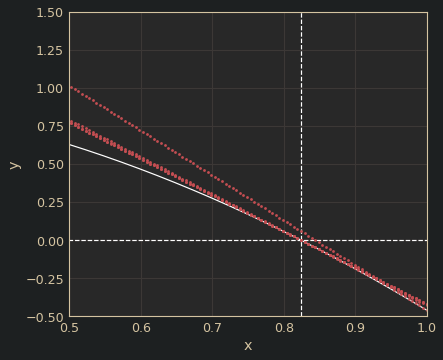

In [ ]:
def fce(x):
    return np.cos(x)-x**2

a = 0.0
b = 1.0
x = np.linspace(a,b,200)
y = fce(x)
plt.plot(x,y,'w-')
plt.xlabel('x')     
plt.ylabel('y')
  
def deriv(f,x):
    h = 0.000000001                 #step-size 
    return (f(x+h) - f(x))/h        #definition of derivative

def tangent_line(f,x_0,a,b):
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 
    
    plt.plot(x,y_tan,'r.')
    return

epsilon = 0.001
error = 1.0
x_i = 0.4
x_r = 1.2599

while (np.abs(error)>epsilon):
    print(x_i)
    buffer = x_i
    x_i = x_i - fce(x_i)/deriv(fce,x_i)
    error = np.abs(buffer - x_i)
    tangent_line(fce,x_i,0,2)
    
plt.vlines(x_i,-2,6,colors='white',linestyles='dashed')
plt.hlines(0,0,2.0,colors='white',linestyles='dashed')
plt.xlim(0.5,1.0)
plt.ylim(-0.5,1.5)
    